# Datos se extraen de https://www.kaggle.com/

escribimos novel corona virus 2019 y damos click en datasets 
 seleccionamos el covid_19_data.csv y damos click en download 

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/My Drive/ColabNotebooks/pandas/db'
!ls

/content/drive/My Drive/ColabNotebooks/pandas/db
covid_19_data.csv		  Meteorite_Landings.csv  test.json
db28				  poblacion.csv		  test.parquet
GlobalLandTemperaturesByCity.csv  test.csv		  test.pkl
GlobalTemperatures.csv		  test.hdf		  test.xlsx


In [3]:
import pandas as pd
pd.__version__
import numpy as np

In [4]:
df=pd.read_csv('covid_19_data.csv')
df.sample(10)
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])


In [5]:
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [6]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [7]:
df=df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


In [8]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(10)


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
2020-01-27,2927.0,82.0,65.0
2020-01-28,5578.0,131.0,108.0
2020-01-29,6165.0,133.0,127.0
2020-01-30,8235.0,171.0,145.0


# vamos a hacer una seleccion de datos df1 los casos confirmados y voy a hacer seleccion con iloc de filas desde la 10 hasta la 15

In [9]:
df1=df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [10]:
df2=df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

Tenemos las df1 y df2 y los dos tienen 5 elementos

cuando tenemos dos series con un sistema de indices de fechas podemos hacer operaciones entre la misma y se van a relacionar segun el indice

In [11]:
df1-df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

# Ahora quiero ver como ha avanzado la sifra da casos dia tras dia 

para eso voy a usar diff que lo que hace es restar cada dia  con el dia previo  y esto muestra el aumento de casos en el dia  a dia 

In [12]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


Si uso mean sabre el aumento diario promedio de casos 

In [13]:
df_time.diff().mean()

Confirmed    344728.200811
Deaths         7167.549696
Recovered    217323.811359
dtype: float64

In [14]:
df_diff = df_time.diff()
df_diff


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


# vamos a ponerle el valor faltante  para que no aparezca NAN

In [15]:
df_time.head(1).to_dict()  

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

# copio el diccionario y lo edito un poco dejando solo las variables numericas

## el resultado es que nuestro dataframe ya no tiene variables nulas

In [16]:
df_diff.fillna({'Confirmed':  557.0 ,
 'Deaths': 17.0,
 'Recovered': 30.0})

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [17]:
df_diff=df_diff.fillna({'Confirmed':  557.0 ,
 'Deaths': 17.0,
 'Recovered': 30.0})

In [18]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


Ahora que no tenemos celdas nulas podemos  aplicar sum acumulativa

In [19]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


#ahora vamos a hacer resample para poder hacer unas estimaciones estadisticas cada 7 dias y sobre este aplique la suma de los valores

## entonces lo que suvede en los valores en los intervalos van a estar sumados cada 7 dias osea agrugar de a 7

In [20]:
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,108.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


# tambien podemos ponerlo cada domingo definiendolo con

```
 W-Sun

```
para cada mes con 

```
M

```

In [21]:
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,56.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2769.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12528.0
...,...,...,...
2021-05-02,5680889.0,93206.0,4734311.0
2021-05-09,5459865.0,90258.0,4759410.0
2021-05-16,4739560.0,86338.0,4692644.0


In [22]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,225.0
2020-02-29,76087.0,2728.0,39556.0
2020-03-31,771462.0,39242.0,138226.0
2020-04-30,2401731.0,192394.0,837095.0
2020-05-31,2910561.0,138242.0,1626127.0
2020-06-30,4319842.0,138411.0,2711439.0
2020-07-31,7127806.0,168508.0,5019965.0
2020-08-31,7909780.0,171272.0,6449484.0
2020-09-30,8504867.0,163907.0,6847448.0


# SI CAMBIO SUM  POR COUNT  voy a ver el numero de datos que estan sobre el mes

```
df_diff.resample('M').count()

```

In [23]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


# **25Series de Tiempo: variables nulas.**

vemos que con 



```
# .sum  hay citios con cero 
pero con 
.mean  nos da  nan
```



In [24]:
df_diff.resample('12h').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-05-27 00:00:00,554368.0,12753.0,697358.0
2021-05-27 12:00:00,0.0,0.0,0.0
2021-05-28 00:00:00,499934.0,11820.0,554963.0


In [25]:
df_diff.resample('12h').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-05-27 00:00:00,554368.0,12753.0,697358.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,499934.0,11820.0,554963.0


#  voy a establecer que para que se realice la suma halla almenos un elemento con 



```
# min_count=1
```



In [26]:
df_diff.resample('12h').sum(min_count=1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-05-27 00:00:00,554368.0,12753.0,697358.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,499934.0,11820.0,554963.0


# ahora al df_cum vamos a tratar de completar todos los valores nulos con 


```
 .bfill que copia el valor siguiente donde habia un valor nulo 

.ffill que trae el valor previo 

.fillna(98) para colocar el valor que quiero

.interpolate()  que interpola los valores medios entre cada registro 
```



In [27]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [28]:
df_cum.bfill() 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [29]:
df_cum.ffill() 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,557.0,17.0,30.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1097.0,34.0,60.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,168970791.0,3511297.0,106078106.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [30]:
df_cum.fillna(988989) 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,988989.0,988989.0,988989.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,988989.0,988989.0,988989.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,988989.0,988989.0,988989.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [31]:
df_cum.interpolate() 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


# vamos a crear una nueva columna que es la tasa de supervivencia del coronavirus que es  

1 - numero casos personsa que han fallesido / numero de casos confirmados

In [32]:
df_cum=df_cum.interpolate()
df_cum['rate']=1-df_cum['Deaths']/df_cum['Confirmed']

In [33]:
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211


# ahora vamos a modificar el data frame y la columna qque es el indice la vamos a modificar para contemplar un nuevo caso de bases de datos y es cuando nuestra variable tipo tiempo no es el indice si no una columna mas

In [34]:
df_cum=df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


#vamos a usar un grupbay especial para series de tiempo 



```
grouper
```



In [35]:
df_cum.groupby(pd.Grouper(key='ObservationDate',freq='M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960046
2020-04-30,0.935326
2020-05-31,0.933192
2020-06-30,0.945718
2020-07-31,0.957081
2020-08-31,0.964339
2020-09-30,0.968524


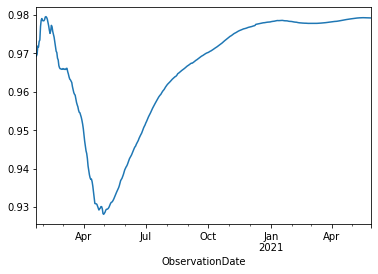

In [36]:
sr=df_cum.groupby(pd.Grouper(key='ObservationDate',freq='1D'))['rate'].mean()
sr.plot()

# rolling me permite hacer promedios con una ventana de frecuencias

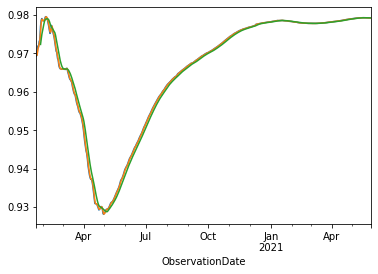

In [37]:
sr.plot()
sr.rolling(window=2).mean().plot()
sr.rolling(window=7).mean().plot()


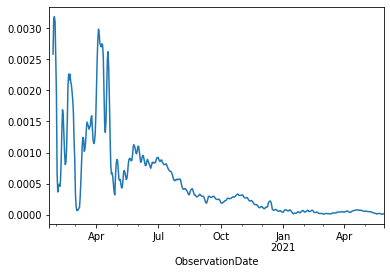

In [38]:
sr.rolling(window=7).std().plot()


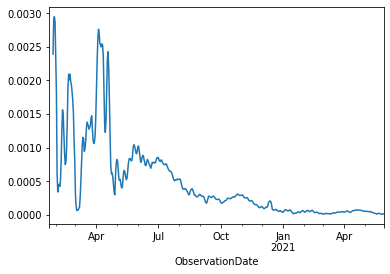

In [39]:
sr.rolling(window=7).apply(lambda x : np.std(x)).plot()


# 26 Visualización y graficación de datos

caul es el pais con mas ocurrencias de coronavirus

In [40]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
France             5863138.0
India              5713215.0
Turkey             5235978.0
UK                 3910803.0
US                 3788713.0
                     ...    
East Timor               1.0
Curacao                  1.0
Channel Islands          1.0
 Azerbaijan              1.0
China                    0.0
Name: Confirmed, Length: 229, dtype: float64

In [41]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

In [42]:
df_france =df_time.loc['France',:]
df_france

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-24,2.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,3.0,0.0,0.0
2020-01-27,3.0,0.0,0.0
2020-01-28,4.0,0.0,0.0
...,...,...,...
2021-05-25,5670486.0,109040.0,386798.0
2021-05-26,5683143.0,109185.0,388128.0
2021-05-27,5697076.0,109327.0,389105.0


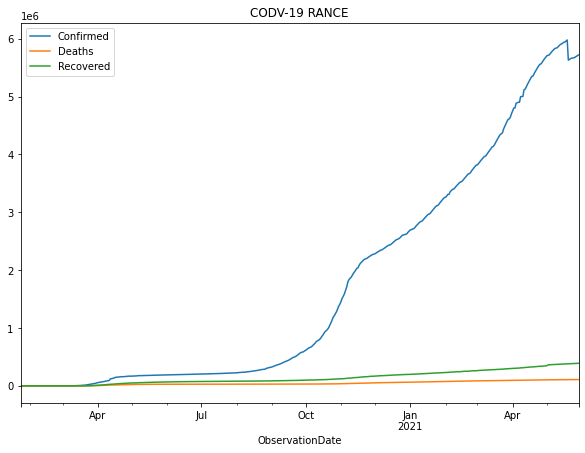

In [43]:
df_france.plot(figsize =(10,7),title='CODV-19 RANCE')

In [44]:
df_colombia= df_time.loc['Colombia',:]
df_colombia

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-03-06,1.0,0.0,0.0
2020-03-07,1.0,0.0,0.0
2020-03-08,1.0,0.0,0.0
2020-03-09,1.0,0.0,0.0
...,...,...,...
2021-05-25,3270614.0,85666.0,3063330.0
2021-05-26,3294101.0,86180.0,3078965.0
2021-05-27,3319193.0,86693.0,3101390.0


In [45]:
import matplotlib.pyplot as plt



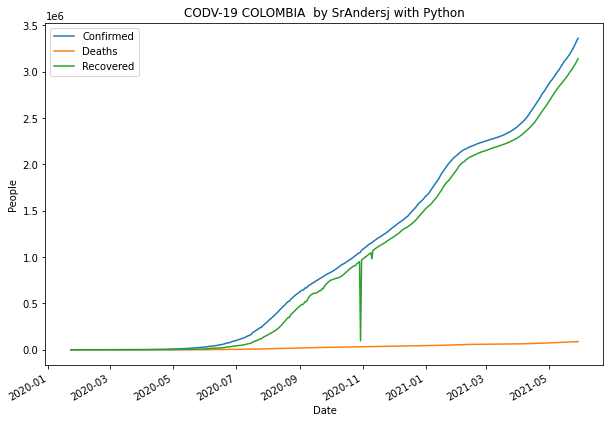

In [46]:
df_colombia.plot(figsize = (10,7), title = 'CODV-19 COLOMBIA  by SrAndersj with Python')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()



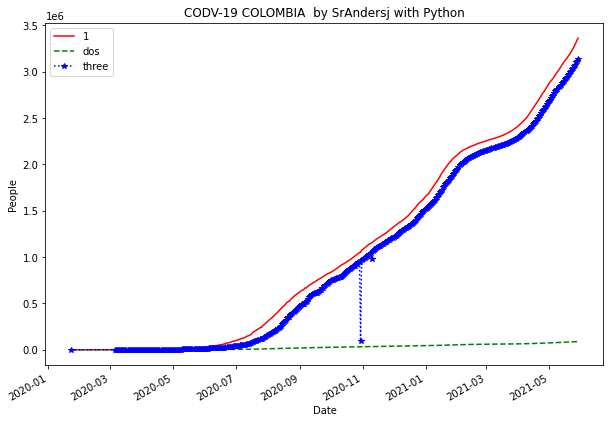

In [47]:
ax = df_colombia.plot(figsize = (10,7), title = 'CODV-19 COLOMBIA  by SrAndersj with Python'
,legend =False,
style =['r-','g--','b:*'])
ax.legend(['1','dos','three'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [48]:
df_monthly =df_colombia.resample('M').max()

df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,NaN,NaN,NaN
2020-03-31,906.0,16.0,31.0
2020-04-30,6507.0,293.0,1439.0
2020-05-31,27219.0,916.0,7032.0
2020-06-30,95269.0,3376.0,40021.0
2020-07-31,295508.0,10105.0,154387.0
2020-08-31,615094.0,19662.0,459460.0
2020-09-30,829679.0,25998.0,743653.0


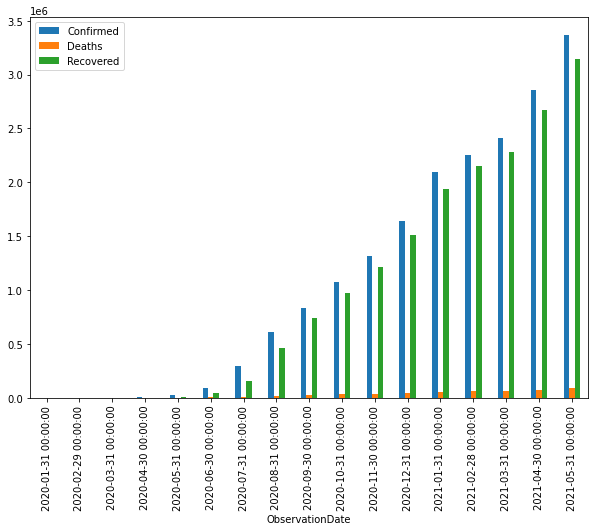

In [49]:
df_monthly.plot( figsize = (10,7), kind='bar')

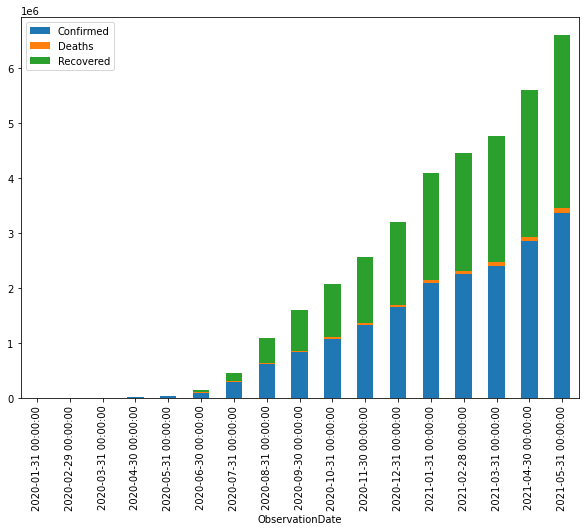

In [50]:
df_monthly.plot( figsize = (10,7), kind='bar',stacked=True)

In [51]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True)

KeyError: ignored

In [ ]:
df_colombia['rate']=1-df_colombia['Deaths']/df_colombia['Confirmed']
df_colombia['rate'].hist(figsize = (10,7),bins=10)

In [ ]:
df_colombia['rate'].plot(kind='kde',figsize = (10,7))  

# en general solo con cambiar el kind podemos cambiar tipo de grafica entonces la documentacion es la siguiente

[listado Pandas Plot kind](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)